In [512]:
# 경고(warnimg) 표시 무시

import warnings
warnings.filterwarnings('ignore')

In [513]:
import pandas as pd
import numpy as np

# "uriage파일 불러와서 head표시"

uriage = pd.read_csv("uriage.csv")
uriage.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [514]:
# 'uriage' 파일의 column별 datatype 확인

uriage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   purchase_date  2999 non-null   object 
 1   item_name      2999 non-null   object 
 2   item_price     2612 non-null   float64
 3   customer_name  2999 non-null   object 
dtypes: float64(1), object(3)
memory usage: 93.8+ KB


In [515]:
# 고객정보인 'kokyaku_daich'파일 불러와서 'kokyaku_data'에 할당

kokyaku_data = pd.read_excel("kokyaku_daicho.xlsx", engine = 'openpyxl')
kokyaku_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [516]:
# 'kokyaku_daicho'파일의 column별 datatype 확인

kokyaku_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   고객이름    200 non-null    object
 1   지역      200 non-null    object
 2   등록일     200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [517]:
# '고객이름'의 성과 이름이 띄어져있어서 replace 함수를 사용하여 없애줌

kokyaku_data["고객이름"] = kokyaku_data['고객이름'].str.replace(" ", "")
kokyaku_data["고객이름"]

0      김현성
1      김도윤
2      김지한
3      김하윤
4      김시온
      ... 
195    김재희
196    김도영
197    김이안
198    김시현
199    김서우
Name: 고객이름, Length: 200, dtype: object

In [518]:
# 마찬가지로 'item_name'의 정보에 띄어쓰기 없애줌

uriage['item_name'] = uriage['item_name'].str.replace(" ", "")
uriage['item_name']

0       상품A
1       상품S
2       상품a
3       상품Z
4       상품a
       ... 
2994    상품Y
2995    상품M
2996    상품Q
2997    상품H
2998    상품D
Name: item_name, Length: 2999, dtype: object

In [519]:
# 'item_name'의 소문자일 때와 대문자일 때의 가격이 같기 때문에 대문자로 통일
# 'series' type은 대문자로 바꿔줄 수 없기 때문에 문자열(str)로 바꾼 후 upper() 함수 사용

uriage['item_name'] = uriage['item_name'].str.upper()
uriage

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상품S,NaN,김우찬
2,2019-05-11 19:42,상품A,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품A,NaN,김강현
...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원
2996,2019-03-29 11:14,상품Q,NaN,김지율
2997,2019-07-14 12:56,상품H,NaN,김승주


In [520]:
# unique 함수를 'item_name'의 유일한 값 찾기

uriage['item_name'].unique()

array(['상품A', '상품S', '상품Z', '상품V', '상품O', '상품U', '상품L', '상품C', '상품I',
       '상품R', '상품X', '상품G', '상품P', '상품Q', '상품Y', '상품N', '상품W', '상품E',
       '상품K', '상품B', '상품F', '상품D', '상품M', '상품H', '상품T', '상품J'],
      dtype=object)

In [521]:
# unique 함수를 'item_price'의 유일한 값 찾기 

uriage['item_price'].unique()

# 'item_price'에 nan값 존재

array([ 100.,   nan, 2600., 1900., 2200., 1500., 2100., 1200.,  300.,
        900., 1800., 2400.,  700., 1600., 1700., 2500., 2300.,  500.,
       1100.,  200.,  600., 1400.,  400., 1300.,  800., 2000., 1000.])

In [522]:
# "item_price"의 NaN값 처리해줄 필요 있음

uriage

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상품S,NaN,김우찬
2,2019-05-11 19:42,상품A,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품A,NaN,김강현
...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원
2996,2019-03-29 11:14,상품Q,NaN,김지율
2997,2019-07-14 12:56,상품H,NaN,김승주


In [523]:
# "item_price" 값들 중 NaN이 있는 index를 "find_Nan"에 할당 

find_Nan = uriage["item_price"].isnull()
find_Nan

0       False
1        True
2        True
3       False
4        True
        ...  
2994    False
2995    False
2996     True
2997     True
2998    False
Name: item_price, Length: 2999, dtype: bool

In [524]:
# "item_price"에서 NaN 값이 아닌 index를 "find_price"에 할당 

find_price = uriage[find_Nan == False]
find_price

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
3,2019-02-12 23:40,상품Z,2600.0,김재현
5,2019-03-20 19:16,상품S,1900.0,김우진
7,2019-04-18 0:14,상품V,2200.0,김민혁
8,2019-01-10 15:51,상품O,1500.0,김선우
...,...,...,...,...
2991,2019-02-18 14:36,상품W,2300.0,김우빈
2993,2019-01-25 3:57,상품C,300.0,김이안
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원


In [525]:
find_Nan

0       False
1        True
2        True
3       False
4        True
        ...  
2994    False
2995    False
2996     True
2997     True
2998    False
Name: item_price, Length: 2999, dtype: bool

In [526]:
uriage

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상품S,NaN,김우찬
2,2019-05-11 19:42,상품A,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품A,NaN,김강현
...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원
2996,2019-03-29 11:14,상품Q,NaN,김지율
2997,2019-07-14 12:56,상품H,NaN,김승주


In [527]:
list(uriage.loc[find_Nan, "item_name"].unique())

['상품S',
 '상품A',
 '상품P',
 '상품N',
 '상품W',
 '상품R',
 '상품I',
 '상품L',
 '상품F',
 '상품O',
 '상품B',
 '상품C',
 '상품V',
 '상품Q',
 '상품U',
 '상품K',
 '상품T',
 '상품X',
 '상품E',
 '상품M',
 '상품G',
 '상품J',
 '상품D',
 '상품H',
 '상품Y']

In [528]:
# "item_price"의 결측치(Nan) 채워주기 

for i in list(uriage.loc[find_Nan, "item_name"].unique()):
    
    ad = find_price.loc[(find_price["item_name"] == i), "item_price"].iloc[0]
   
    uriage["item_price"].loc[(find_Nan) & (uriage["item_name"] == i)] = ad
        
uriage

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상품S,1900.0,김우찬
2,2019-05-11 19:42,상품A,100.0,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품A,100.0,김강현
...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민
2995,2019-06-22 4:03,상품M,1300.0,김재원
2996,2019-03-29 11:14,상품Q,1700.0,김지율
2997,2019-07-14 12:56,상품H,800.0,김승주


In [529]:
# "등록일"의 날짜 표기법이 다른 것들이 있음 -> 처리해줄 필요 있음

kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04 00:00:00
1,김도윤,E시,42782
2,김지한,A시,2018-01-07 00:00:00
3,김하윤,F시,42872
4,김시온,E시,43127
...,...,...,...
195,김재희,G시,2017-06-20 00:00:00
196,김도영,E시,2018-06-20 00:00:00
197,김이안,F시,2017-04-29 00:00:00
198,김시현,H시,2019-04-19 00:00:00


In [530]:
from datetime import timedelta, datetime
import datetime

for i in range(len(kokyaku_data['등록일'])):
    if type(kokyaku_data['등록일'].iloc[i]) != int:
        print(kokyaku_data['등록일'].iloc[i])

2018-01-04 00:00:00
2018-01-07 00:00:00
2017-06-20 00:00:00
2018-06-11 00:00:00
2017-05-19 00:00:00
2018-02-12 00:00:00
2017-07-05 00:00:00
2018-03-31 00:00:00
2017-04-22 00:00:00
2018-03-09 00:00:00
2017-03-13 00:00:00
2018-01-24 00:00:00
2017-06-09 00:00:00
2018-05-02 00:00:00
2017-02-05 00:00:00
2018-07-10 00:00:00
2017-07-08 00:00:00
2018-03-12 00:00:00
2018-02-28 00:00:00
2017-05-16 00:00:00
2018-01-29 00:00:00
2017-03-17 00:00:00
2018-06-28 00:00:00
2018-05-21 00:00:00
2017-03-12 00:00:00
2018-07-01 00:00:00
2017-01-30 00:00:00
2018-02-06 00:00:00
2017-01-30 00:00:00
2018-04-21 00:00:00
2017-04-01 00:00:00
2018-04-07 00:00:00
2017-07-28 00:00:00
2018-05-09 00:00:00
2017-02-19 00:00:00
2018-01-08 00:00:00
2017-07-10 00:00:00
2018-02-06 00:00:00
2017-06-16 00:00:00
2018-05-22 00:00:00
2017-07-07 00:00:00
2018-02-02 00:00:00
2018-02-22 00:00:00
2018-01-11 00:00:00
2017-04-11 00:00:00
2018-07-22 00:00:00
2018-05-13 00:00:00
2017-01-07 00:00:00
2018-07-23 00:00:00
2017-05-30 00:00:00


In [531]:
# '4xxxx'형태의 데이터 -> '201x-xx-xx'형태로 변경 
from datetime import timedelta, datetime
import datetime

# '4xxxx'값을 365로 나누면 약 110~120.xxx값으로 나옴. 이 값은 '년'으로 추정
# 기준점(1900.1.1) day1에 할당
day1 = datetime.date(1900, 1, 1)

# ('4xxxx' -> int) / (201x-xx-xx xx:xx:xx' -> datetime.datetime) 
# 'int' type일 경우, days값으로 넣어줌
# 'datetime.datetime' type일 경우 띄어쓰기 기준으로 분리 후 
# '201x-xx-xx'값 으로 변경 
for i in range(len(kokyaku_data['등록일'])):
    if type(kokyaku_data['등록일'].iloc[i]) == int:
        a = day1 + timedelta(days = kokyaku_data['등록일'].iloc[i])
        kokyaku_data['등록일'].iloc[i] = a
    else :
        b = str(kokyaku_data['등록일'].iloc[i]).split()[0]
        kokyaku_data['등록일'].iloc[i] = b

In [532]:
kokyaku_data

,고객이름,지역,등록일
0,김현성,H시,2018-01-04
1,김도윤,E시,2017-02-18
2,김지한,A시,2018-01-07
3,김하윤,F시,2017-05-19
4,김시온,E시,2018-01-29
...,...,...,...
195,김재희,G시,2017-06-20
196,김도영,E시,2018-06-20
197,김이안,F시,2017-04-29
198,김시현,H시,2019-04-19


In [533]:
# 전처리가 완료된 'uriage'파일과 'kokyaku_data'파일 병합

merge_data = pd.merge(uriage
                      , kokyaku_data
                      , left_on = "customer_name"
                      , right_on = "고객이름"
                      , how = "left")

In [534]:
# merge_data 인덱스 초기화 

merge_data.reset_index

<bound method DataFrame.reset_index of          purchase_date item_name  item_price customer_name 고객이름  지역  \
0     2019-06-13 18:02       상품A       100.0           김가온  김가온  C시   
1     2019-07-13 13:05       상품S      1900.0           김우찬  김우찬  C시   
2     2019-05-11 19:42       상품A       100.0           김유찬  김유찬  A시   
3     2019-02-12 23:40       상품Z      2600.0           김재현  김재현  D시   
4      2019-04-22 3:09       상품A       100.0           김강현  김강현  D시   
...                ...       ...         ...           ...  ...  ..   
2994   2019-02-15 2:56       상품Y      2500.0           김정민  김정민  B시   
2995   2019-06-22 4:03       상품M      1300.0           김재원  김재원  E시   
2996  2019-03-29 11:14       상품Q      1700.0           김지율  김지율  B시   
2997  2019-07-14 12:56       상품H       800.0           김승주  김승주  E시   
2998   2019-07-21 0:31       상품D       400.0           정준기  정준기  B시   

             등록일  
0     2017-01-26  
1     2018-04-07  
2     2018-06-19  
3     2018-07-22  
4     2017-06

In [535]:
merge_data

,purchase_date,item_name,item_price,customer_name,고객이름,지역,등록일
0,2019-06-13 18:02,상품A,100.0,김가온,김가온,C시,2017-01-26
1,2019-07-13 13:05,상품S,1900.0,김우찬,김우찬,C시,2018-04-07
2,2019-05-11 19:42,상품A,100.0,김유찬,김유찬,A시,2018-06-19
3,2019-02-12 23:40,상품Z,2600.0,김재현,김재현,D시,2018-07-22
4,2019-04-22 3:09,상품A,100.0,김강현,김강현,D시,2017-06-07
...,...,...,...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민,김정민,B시,2017-07-01
2995,2019-06-22 4:03,상품M,1300.0,김재원,김재원,E시,2018-03-31
2996,2019-03-29 11:14,상품Q,1700.0,김지율,김지율,B시,2017-03-15
2997,2019-07-14 12:56,상품H,800.0,김승주,김승주,E시,2018-07-15


In [536]:
# 'customer_name'과 '고객이름'이 겹치는 column이기 때문에 둘 중 하나 버림

merge_data.drop("customer_name", axis = 1)

,purchase_date,item_name,item_price,고객이름,지역,등록일
0,2019-06-13 18:02,상품A,100.0,김가온,C시,2017-01-26
1,2019-07-13 13:05,상품S,1900.0,김우찬,C시,2018-04-07
2,2019-05-11 19:42,상품A,100.0,김유찬,A시,2018-06-19
3,2019-02-12 23:40,상품Z,2600.0,김재현,D시,2018-07-22
4,2019-04-22 3:09,상품A,100.0,김강현,D시,2017-06-07
...,...,...,...,...,...,...
2994,2019-02-15 2:56,상품Y,2500.0,김정민,B시,2017-07-01
2995,2019-06-22 4:03,상품M,1300.0,김재원,E시,2018-03-31
2996,2019-03-29 11:14,상품Q,1700.0,김지율,B시,2017-03-15
2997,2019-07-14 12:56,상품H,800.0,김승주,E시,2018-07-15


In [537]:
# 데이터를 계산, 요약 및 분석하는 강력한 도구인 피벗테이블로 변환

city = merge_data.pivot_table(index ="item_name"
                              ,columns ="지역"
                              ,aggfunc ="size"
                              ,fill_value=0)

In [538]:
city

지역,A시,B시,C시,D시,E시,F시,G시,H시
item_name,,,,,,,,
상품A,12,12,27,18,24,22,13,11
상품B,17,10,19,9,15,16,8,19
상품C,18,23,20,10,12,17,12,21
상품D,23,16,13,14,11,21,12,15
상품E,16,12,16,10,16,10,12,13
상품F,25,11,25,14,12,17,13,9
상품G,12,21,10,13,9,17,14,14
상품H,15,13,20,10,20,12,10,9
상품I,16,9,18,10,17,18,16,10


In [539]:
type(city)

pandas.core.frame.DataFrame

In [540]:
type(city['A시'])

pandas.core.series.Series

In [541]:
city_c = [city['A시']
          , city['B시']
          , city['C시']
          , city['D시']
          , city['E시']
          , city['F시']
          , city['G시']
          , city['H시']]

In [542]:
type(city_c)

list

In [543]:
city_c = pd.Series(city_c)

In [544]:
# 한글문제 해결
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

<AxesSubplot:xlabel='item_name'>

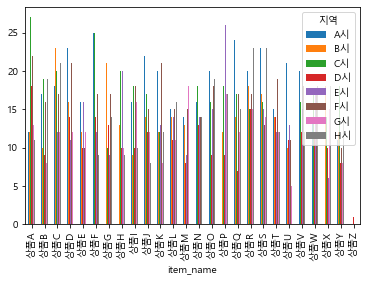

In [545]:
# 상품 당 도시별 판매량

import matplotlib.pyplot as plt
%matplotlib inline

city.plot(kind = 'bar')

<AxesSubplot:xlabel='지역'>

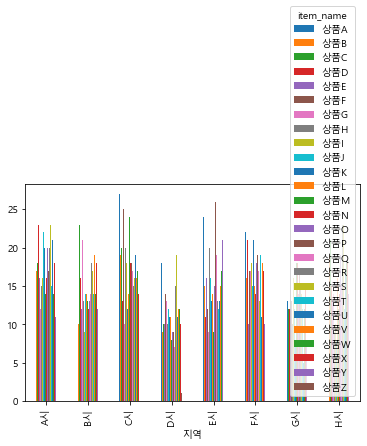

In [546]:
# 도시 당 상품별 판패량

import matplotlib.pyplot as plt
%matplotlib inline

t_city = city.T

t_city.plot(kind = 'bar')

<AxesSubplot:xlabel='지역'>

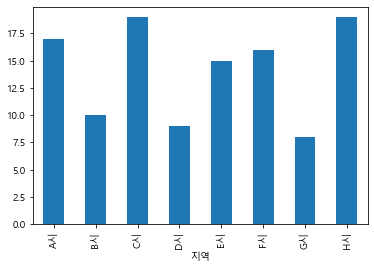

In [547]:
# 'A시' 

city.iloc[1].plot(kind = 'bar')

<AxesSubplot:ylabel='상품A'>

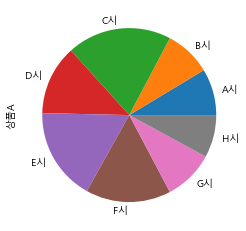

In [548]:
# 상품 A의 도시별 판패량
city.iloc[0].plot(kind = 'pie')